<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [51]:
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Department_encoded'] = label_encoder.fit_transform(df['Department'])

In [55]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,7
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7
3,0.72,0.87,5,223,5,0,1,0,sales,low,7
4,0.37,0.52,2,159,3,0,1,0,sales,low,7


In [57]:
dummies = pd.get_dummies(df.salary)
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [59]:
merged = pd.concat([df,dummies],axis = 'columns')
merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_encoded,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,8,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,support,low,8,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,support,low,8,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,support,low,8,False,True,False


In [61]:
merged = merged.drop(columns=['Department', 'salary'],axis=1)

In [63]:
merged.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_encoded,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,7,False,True,False
1,0.80,0.86,5,262,6,0,1,0,7,False,False,True
2,0.11,0.88,7,272,4,0,1,0,7,False,False,True
3,0.72,0.87,5,223,5,0,1,0,7,False,True,False
4,0.37,0.52,2,159,3,0,1,0,7,False,True,False


In [65]:
merged.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_encoded,high,low,medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,0.076756,-0.082832,0.040985
Department_encoded,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,-0.033781,0.036324,-0.017906
high,0.029708,-0.020628,-0.008726,-0.007101,0.039953,0.009040,-0.120929,0.076756,-0.033781,1.000000,-0.292560,-0.260274


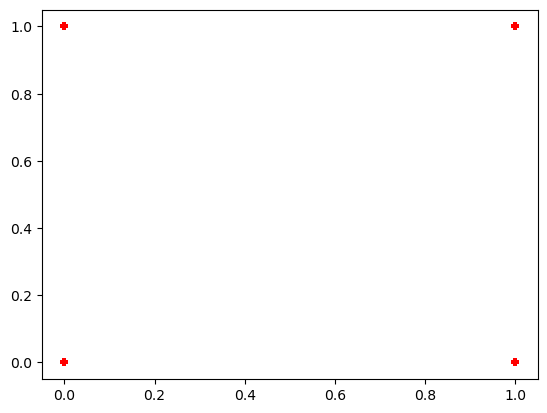

In [71]:
import matplotlib.pyplot as plt
plt.scatter(merged.high, merged.left, marker='+',color='red')

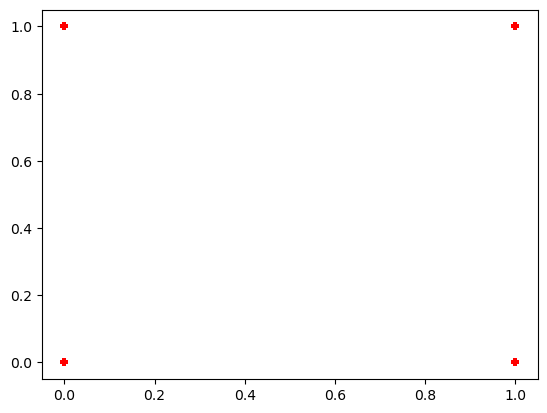

In [73]:
import matplotlib.pyplot as plt
plt.scatter(merged.low, merged.left, marker='+',color='red')

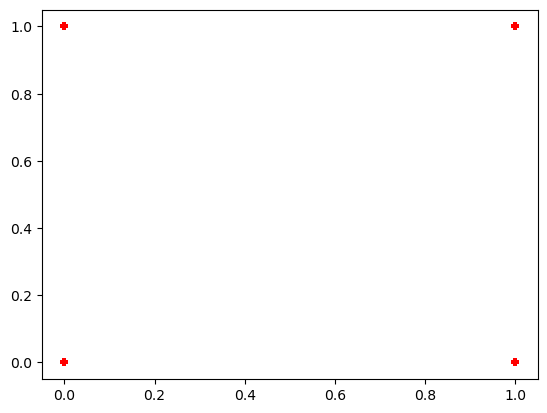

In [75]:
import matplotlib.pyplot as plt
plt.scatter(merged.medium, merged.left, marker='+',color='red')

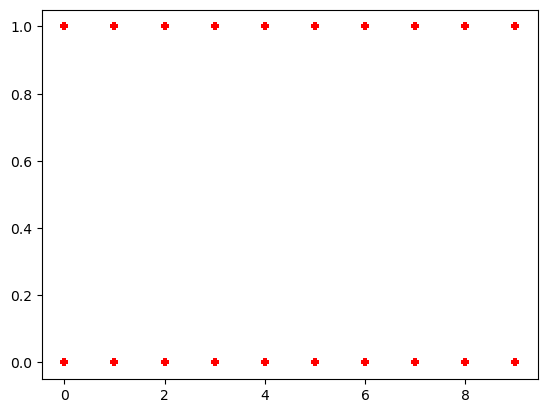

In [79]:
import matplotlib.pyplot as plt
plt.scatter(merged.Department_encoded, merged.left, marker='+',color='red')

In [87]:
X  = merged.drop(columns=['left'],axis=1)
y = merged.left

In [89]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_encoded,high,low,medium
0,0.38,0.53,2,157,3,0,0,7,False,True,False
1,0.80,0.86,5,262,6,0,0,7,False,False,True
2,0.11,0.88,7,272,4,0,0,7,False,False,True
3,0.72,0.87,5,223,5,0,0,7,False,True,False
4,0.37,0.52,2,159,3,0,0,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,False,True,False
14995,0.37,0.48,2,160,3,0,0,8,False,True,False
14996,0.37,0.53,2,143,3,0,0,8,False,True,False
14997,0.11,0.96,6,280,4,0,0,8,False,True,False


In [91]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [97]:
from sklearn.linear_model import LogisticRegression 

In [99]:
model = LogisticRegression()

In [101]:
model.fit(X_train, y_train)

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
model.score(X_test,y_test)*100

78.06666666666666